<a href="https://colab.research.google.com/github/Sagarjain93/Operations_transaction_Data/blob/main/transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title - Operational Transaction Data Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Sagar jain

#**1. Project Summary**

This project focuses on the exploratory analysis of operational transaction data to uncover behavioral patterns, potential fraud indicators, and performance bottlenecks. The dataset comprises detailed records of digital transactions including user identifiers, transaction metadata, network characteristics (like latency and bandwidth), device information, and fraud labels. Given the integration of both financial and network-level parameters, this dataset offers a unique opportunity to analyze how operational conditions impact financial transactions, and whether they correlate with suspicious or failed activities. The aim is to derive actionable insights that can support anomaly detection, fraud prevention, and system optimization.

*Potential Hypotheses to Explore*

**Fraud Detection Hypotheses**

1.Transactions with unusually high amounts have a higher chance of being fraudulent.

2.Fraudulent transactions are more likely to be initiated from mobile or unknown devices.

3.Transactions with higher latency or low bandwidth are more prone to fraud.

**Behavioral/Usage Patterns**

1.Users typically interact with a fixed set of counterparties (receiver accounts).

2.Certain PIN codes (locations) show higher transaction volumes or fraud rates.

**Network Impact Hypotheses**

1.Higher network latency is associated with increased transaction failures.

2.Specific Network Slice IDs are more commonly associated with failed or delayed transactions.

**Temporal Trends**

1.Fraudulent activity peaks during specific hours of the day or days of the week.

2.Transaction volume is higher during business hours and lower on weekends.

**Geolocation Hypotheses**

1.Certain geolocations (based on latitude/longitude or PIN code) are hotspots for fraud.

2.Distance between sender and receiver accounts correlates with fraud probability.

#**2. Data Description**

This dataset contains transactional records from an operational system, capturing various attributes related to digital money transfers.

**Transaction ID:** Unique identifier for each transaction.

**Sender Account ID:** ID of the account initiating the transaction.

**Receiver Account ID:** ID of the account receiving the funds.

**Transaction Amount:** Monetary value involved in the transaction.

**Transaction Type:** Type/category of the transaction (e.g., transfer, withdrawal, deposit).

**Timestamp:** Date and time when the transaction occurred.

**Transaction Status:** Status of the transaction (e.g., success, failed, pending).

**Fraud Flag:** Binary indicator (1 = fraudulent, 0 = genuine).

**Geolocation (Latitude/Longitude):** Coordinates of the transaction origin.

**Device Used:** Device type used to perform the transaction (e.g., mobile, desktop).

**Network Slice ID:** ID of the network slice allocated during the transaction (5G context).

**Latency (ms):** Network latency experienced during the transaction.

**Slice Bandwidth (Mbps):** Bandwidth available via the assigned network slice.

**PIN Code:** Postal code of the user’s location during the transaction.

#**3. Github link**

https://github.com/Sagarjain93/Operations_transaction_Data

# **4. Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

#**5. Know Your Data**

## **5.1 Import Libraries**

In [1]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Set Consistent theme for all plots
sns.set_theme(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **5.2 Load Dataset**


To begin the analysis, the marketing dataset is loaded directly from Google Drive. This approach ensures convenient access to the data stored in the cloud, especially when working in collaborative or cloud-based environments like Google Colab. By mounting Google Drive or using a shareable link, we can seamlessly import the dataset into our workspace for further processing and analysis.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/8. Operations/transaction_data.csv')

## **5.3. Dataset First View**

In [4]:
df.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",Desktop,Slice3,10,179,3075
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,11,89,2369
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",Mobile,Slice1,4,53,8039
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",Mobile,Slice3,10,127,6374
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",Mobile,Slice3,20,191,8375


In [15]:
df.tail()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,2025-01-17 10:49:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,19,224,9766
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,2025-01-17 11:00:00,Failed,True,"55.7558 N, 37.6173 W",Mobile,Slice2,12,56,1009
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,2025-01-17 10:54:00,Success,False,"34.0522 N, 139.6917 W",Desktop,Slice1,14,151,9301
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,2025-01-17 10:59:00,Success,True,"51.5074 N, 139.6917 W",Mobile,Slice3,8,95,4038
999,TXN3992032184,ACC16789,ACC21980,495.36,Transfer,2025-01-17 10:02:00,Failed,False,"55.7558 N, -74.006 W",Mobile,Slice2,5,155,9888


## **5.4 Check the Dataset Shape**

In [5]:
df.shape

(1000, 14)

In [16]:
df.size

14000

## **5.5 Dataset Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

## **5.6 Duplicate Values**

In [7]:
df.duplicated().sum()

np.int64(0)

## **5.7 Missing Values/Null values**

In [8]:
df.isnull().sum()

,0
Transaction ID,0
Sender Account ID,0
Receiver Account ID,0
Transaction Amount,0
Transaction Type,0
Timestamp,0
Transaction Status,0
Fraud Flag,0
Geolocation (Latitude/Longitude),0
Device Used,0


#**6. Understanding Your Variables**

##**6.1 Dataset Columns**

In [9]:
#dataset columns
df.columns

Index(['Transaction ID', 'Sender Account ID', 'Receiver Account ID',
       'Transaction Amount', 'Transaction Type', 'Timestamp',
       'Transaction Status', 'Fraud Flag', 'Geolocation (Latitude/Longitude)',
       'Device Used', 'Network Slice ID', 'Latency (ms)',
       'Slice Bandwidth (Mbps)', 'PIN Code'],
      dtype='object')

##**6.2 Summary of Dataset**

### **6.2.1 Statistical Summary of Dataset**

In [10]:
# Dataset Describe
df.describe().round()

,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),PIN Code
count,1000.0,1000.0,1000.0,1000.0
mean,771.0,12.0,149.0,5459.0
std,411.0,5.0,58.0,2603.0
min,52.0,3.0,50.0,1000.0
25%,423.0,7.0,98.0,3282.0
50%,762.0,12.0,148.0,5386.0
75%,1123.0,16.0,198.0,7535.0
max,1498.0,20.0,250.0,9999.0


### **6.2.2 Categorical summary of the dataset**

In [18]:
df.describe(include=['object', 'category'])

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Type,Transaction Status,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,PIN Code
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,994,994,3,2,36,2,3,948
top,TXN3992032184,ACC71245,ACC36934,Transfer,Failed,"48.8566 N, 139.6917 W",Mobile,Slice2,3751
freq,1,2,2,374,513,42,521,340,3


##**6.3 Variables Description**

| **Column Name**                    | **Description**                                                                                           |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------- |
| `Transaction ID`                   | Unique identifier for each transaction.                                                                   |
| `Sender Account ID`                | Unique ID of the account that initiated the transaction.                                                  |
| `Receiver Account ID`              | Unique ID of the account that received the transaction.                                                   |
| `Transaction Amount`               | The monetary value of the transaction (in ₹, \$, or other currency).                                      |
| `Transaction Type`                 | Type/category of transaction (e.g., transfer, payment, withdrawal).                                       |
| `Timestamp`                        | Date and time when the transaction occurred.                                                              |
| `Transaction Status`               | Outcome of the transaction (e.g., successful, failed, pending).                                           |
| `Fraud Flag`                       | Boolean flag indicating whether the transaction is fraudulent (`True`) or not (`False`).                  |
| `Geolocation (Latitude/Longitude)` | Location coordinates of where the transaction was made. Usually includes directional values like N/S/E/W. |
| `Device Used`                      | Device used to initiate the transaction (e.g., Mobile, Desktop, ATM).                                     |
| `Network Slice ID`                 | Identifier for the network slice used — relates to 5G or QoS (Quality of Service) parameters.             |
| `Latency (ms)`                     | Time delay (in milliseconds) taken for the transaction or network communication.                          |
| `Slice Bandwidth (Mbps)`           | Network bandwidth allocated for the transaction.                                                          |
| `PIN Code`                         | Postal code of the location where the transaction was initiated.                                          |


## **6.4 Check Unique Values for each variable.**

In [11]:
# Check Unique Values for each variable.
df.nunique()

,0
Transaction ID,1000
Sender Account ID,994
Receiver Account ID,994
Transaction Amount,998
Transaction Type,3
Timestamp,60
Transaction Status,2
Fraud Flag,2
Geolocation (Latitude/Longitude),36
Device Used,2


#**7. Data Wrangling**

## **7.1 Handling Datatypes**

### **7.1.1 Checking Datatypes**

In [12]:
df.dtypes

,0
Transaction ID,object
Sender Account ID,object
Receiver Account ID,object
Transaction Amount,float64
Transaction Type,object
Timestamp,object
Transaction Status,object
Fraud Flag,bool
Geolocation (Latitude/Longitude),object
Device Used,object


### **7.1.2 Converting the required columns datatypes**

In [13]:
df['Geolocation (Latitude/Longitude)'] = df['Geolocation (Latitude/Longitude)'].astype(str)
df['Transaction Type'] = df['Transaction Type'].astype('category')
df['Transaction Status'] = df['Transaction Status'].astype('category')
df['Device Used'] = df['Device Used'].astype('category')
df['Network Slice ID'] = df['Network Slice ID'].astype('category')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['PIN Code'] = df['PIN Code'].astype(str)

In [ ]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


##**7.2 Handling Missing Values**

There are no missing or null values in the dataset

##**7.3 Handling Duplicate Values**

There are no duplicate values in the datasset

## **7.4 Standardize Column Name**

Standardizing column names to ensure consistency, readability, and ease of use throughout the analysis.

###**7.4.1 Rename few columns**

In [20]:
df.rename(columns={
    'Geolocation (Latitude/Longitude)': 'geolocation',
    'Slice Bandwidth (Mbps)': 'bandwidth_mbps',
    'Latency (ms)': 'latency_ms'
}, inplace=True)


### **7.4.2 Standardzing all the columns**

In [21]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('[^a-zA-Z0-9 ]', '', regex=True)
    .str.replace(' ', '_')
)


In [22]:
df.columns

Index(['transaction_id', 'sender_account_id', 'receiver_account_id',
       'transaction_amount', 'transaction_type', 'timestamp',
       'transaction_status', 'fraud_flag', 'geolocation', 'device_used',
       'network_slice_id', 'latencyms', 'bandwidthmbps', 'pin_code'],
      dtype='object')

##**7.5 Identify Numerical And Categorical Columns**

Identifying numerical and categorical columns to guide appropriate analysis, visualization, and preprocessing techniques.

In [28]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
numerical_columns = df.select_dtypes(include='number').columns

In [29]:
# Display categorical columns
categorical_columns

Index(['transaction_id', 'sender_account_id', 'receiver_account_id',
       'transaction_type', 'transaction_status', 'geolocation', 'device_used',
       'network_slice_id', 'pin_code'],
      dtype='object')

In [25]:
# Display numerical columns
numerical_columns

Index(['transaction_amount', 'latencyms', 'bandwidthmbps'], dtype='object')

#**8. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In this section, we use visualizations to uncover patterns, trends, and relationships within the data, helping generate meaningful insights for further analysis.

##**8.1. Univariate Analysis**
Univariate Analysis help understand the distribution and characteristics of individual variables within the dataset. In this step, we explore each feature independently to identify patterns, dominant categories, central tendency, spread, and potential anomalies.

###**Chart-1 Transaction_status**  


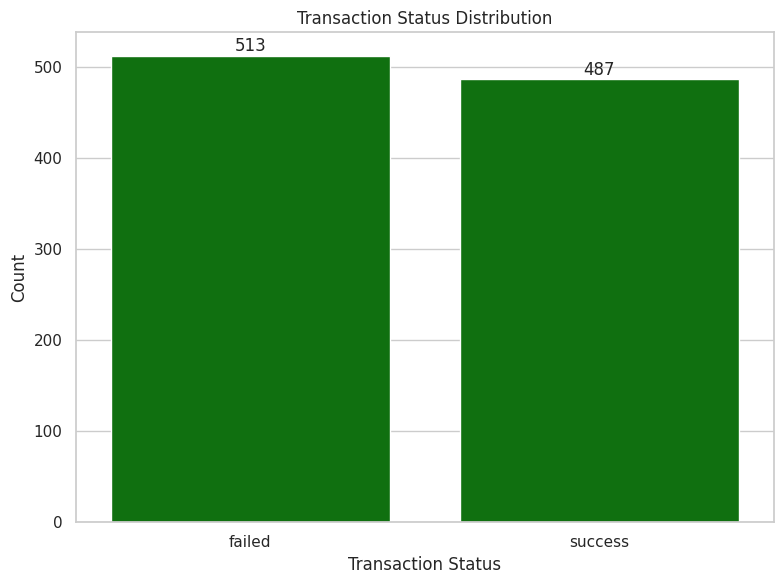

In [ ]:
status_counts = df['transaction_status'].value_counts().reset_index()
status_counts.columns = ['transaction_status', 'count']

# Step 2: Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='transaction_status', y='count', data=status_counts, color="green")

# Step 3: Add count labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
            int(p.get_height()), ha='center', va='bottom')

# Step 4: Titles and axis labels
plt.title('Transaction Status Distribution')
plt.xlabel('Transaction Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Why did you pick this chart?**

A bar plot is perfect for showing frequency distribution of a categorical variable like Transaction Status.

It helps visually compare the count of Success vs Failed transactions.

**What is/are the insight(s) found from the chart?**

Out of 1000 transactions:

513 transactions failed

487 transactions succeeded

The number of failed transactions is slightly higher than successful ones.

**Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity: High failure rate (51.3%) could indicate:**

Payment gateway issues

Network latency

Device compatibility problems

Fraud prevention flags

→ This insight can help in identifying and reducing failure causes, leading to improved user experience and conversion rate.

**⚠️ Negative Growth Indicator:**
 A failure rate over 50% could hurt customer trust, especially in a financial system. It needs investigation.

**Interpretation**
We observe that the out of the total transactions in the dataset which was 1000.
1. Failed Status - 513
2. Sucess Status - 487

###**Chart-2 Fraud Flag**

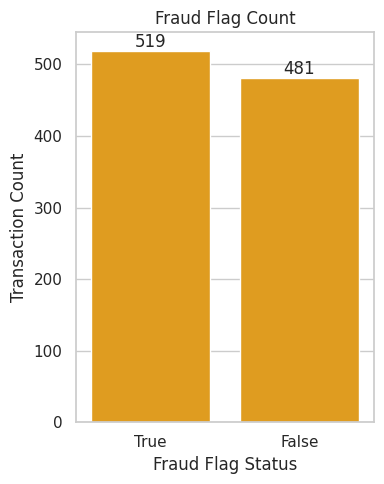

In [ ]:

plt.figure(figsize=(4, 5))

# Count plot for boolean fraud_flag
ax = sns.countplot(x='fraud_flag', data=df,color="orange")

# Add values on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.5,
            int(p.get_height()),
            ha='center', va='bottom')

# Labels and title
plt.title('Fraud Flag Count')
plt.xlabel('Fraud Flag Status')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['True', 'False'])

plt.tight_layout()
plt.show()


**Why did you pick this chart?**

A bar chart is suitable for analyzing Boolean variables like Fraud Flag, which has only two categories: True (fraud) and False (not fraud).

It clearly shows the volume of fraud vs legitimate transactions.

**What is/are the insight(s) found from the chart?**

Out of 1000 total transactions:

519 are flagged as fraud (~51.9%)

481 are non-fraudulent (~48.1%)

This suggests that the dataset contains a balanced distribution of fraud vs non-fraud cases, slightly skewed toward fraud.

**Will the gained insights help create a positive business impact?**

Yes, significantly.

**✅ Positive Impact Opportunity:**

A high fraud count offers a good opportunity to train models for fraud detection.

Businesses can analyze patterns of fraudulent behavior to prevent future attacks.

**⚠️ Red Flag for Business:**

If over 50% of transactions are fraudulent, it could indicate system vulnerabilities, network misuse, or ineffective authentication systems.

Important to deep-dive into patterns involving devices, transaction types, locations, or timestamps.



**Interpretation** - **

###**Chart-3 Transaction Type**


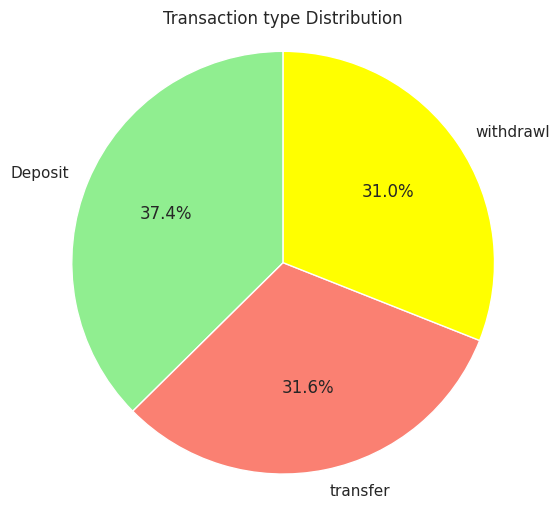

In [ ]:
import matplotlib.pyplot as plt

# Count values
fraud_counts = df['transaction_type'].value_counts()

# Labels and colors
labels = ['Deposit', 'transfer','withdrawl']
colors = ['lightgreen', 'salmon','yellow']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0,0,0))
plt.title('Transaction type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


**Why did you pick this chart?**

A pie chart is effective for visualizing the percentage share of categories within a column like Transaction Type.

It gives a quick snapshot of how transactions are distributed across types (Deposit, Withdrawal, Transfer).

**What is/are the insight(s) found from the chart?**

The distribution is fairly balanced:

Deposit: 37.4%

Transfer: 31.6%

Withdrawal: 31.0%

Deposit transactions are slightly higher than the other two types.

**Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Balanced transaction type usage suggests healthy usage of all financial operations.

Slightly higher deposits might indicate user trust or increasing incoming flow.

**⚠️ Caution Point:**

Further analysis is needed to check if a particular transaction type is more prone to fraud or more likely to fail.

For instance, are transfers or withdrawals failing more often than deposits?



###**Chart-4 Device Used**



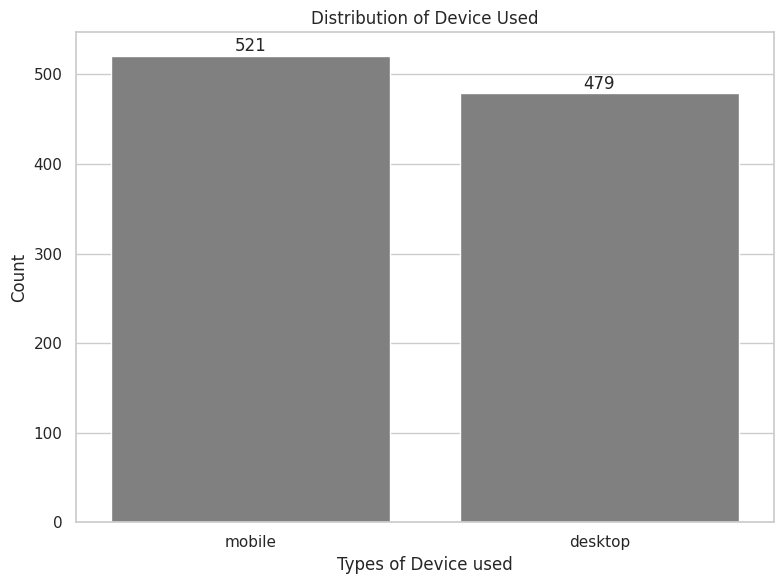

In [ ]:
device_use = df['device_used'].value_counts().reset_index()
device_use.columns = ['device_used', 'count']

# Step 1: Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='device_used', y='count', data=device_use, color="grey")

# Step 3: Add count labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
            int(p.get_height()), ha='center', va='bottom')

# Step 4: Titles and axis labels
plt.title('Distribution of Device Used')
plt.xlabel('Types of Device used')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


** Why did you pick this chart?**

A bar chart is excellent for comparing categories (in this case, Mobile vs Desktop) and quickly identifying which device is more commonly used for transactions.



**📊 2. What is/are the insight(s) found from the chart?**

Out of 1000 transactions:

521 used mobile devices

479 used desktop devices

Slightly more transactions happen through mobile devices than desktops.



**💼 3. Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Mobile is slightly more preferred → Indicates a trend towards mobile banking/usage.

Companies should ensure their mobile platform is optimized and secure.

**⚠️ Investigative Opportunity:**

Check if fraudulent transactions or failures are more common on a particular device type.

This could lead to identifying device-specific vulnerabilities or UX issues.



**Interpretation** - *Mobile are 521 and desktop are 479*

###**Chart-5 NetworkSlice ID**


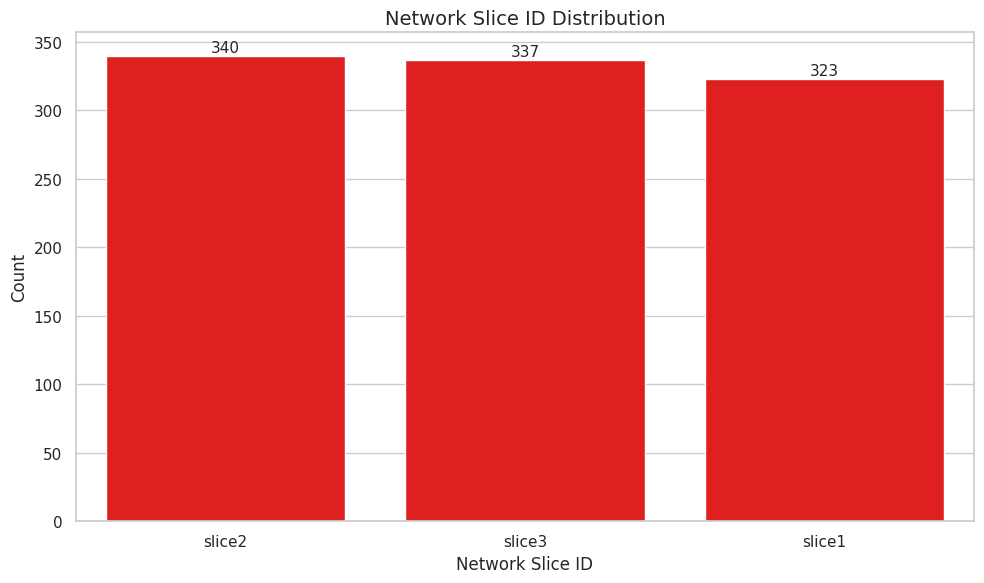

In [ ]:
# Count values
slice_counts = df['network_slice_id'].value_counts().reset_index()
slice_counts.columns = ['network_slice_id', 'count']

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='network_slice_id', y='count', data=slice_counts, color='red')

# Add value labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.5,
            int(p.get_height()),
            ha='center', va='bottom', fontsize=11)

# Titles and labels
plt.title('Network Slice ID Distribution', fontsize=14)
plt.xlabel('Network Slice ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**Why did you pick this chart?**

A bar chart is the most appropriate choice for analyzing the frequency of categorical values like slice1, slice2, and slice3.

It clearly shows which network slices are used more frequently.




**📊 2. What is/are the insight(s) found from the chart?**

Distribution of 1000 transactions by network slice:

slice2: 340 transactions

slice3: 337 transactions

slice1: 323 transactions

The usage is evenly distributed, with a slight preference for slice2.



**💼 3. Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Balanced distribution means network load is well managed across slices.

Insight can be used to ensure load balancing and optimization across slices.

**⚠️ Potential Follow-up:**

Analyze fraud or failed transactions by slice ID to check if any specific network slice is vulnerable or underperforming.

Also, compare latency and bandwidth by slice to determine performance variation.


**Interpretation** -  

*Slice1 -  323*

*Slice2 - 337*

*Slice3 - 340*

##**8.2 Bivariate Analysis**

Bivariate analysis explores the relationship between two variables. It helps identify patterns, correlations, or interactions between a dependent and an independent variable (or two independents). This step builds on univariate analysis by revealing how one feature may influence or relate to another.

###**8.2.A Categorical vs Categorical**

####**Chart-6 Transaction_type vs Transaction status**

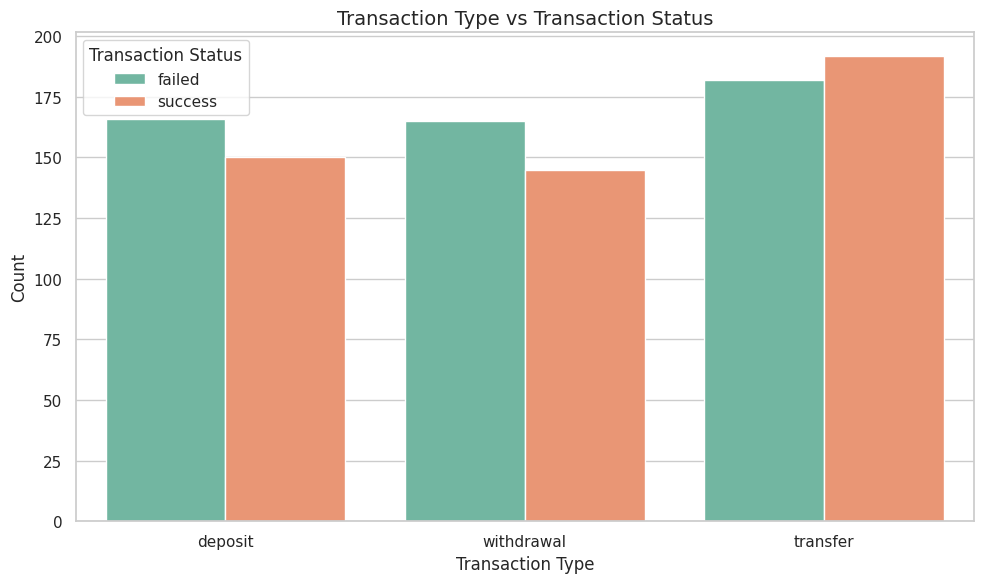

In [ ]:

plt.figure(figsize=(10, 6))

# Create grouped bar plot
sns.countplot(x='transaction_type', hue='transaction_status', data=df, palette='Set2')

# Add titles and labels
plt.title('Transaction Type vs Transaction Status', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Transaction Status')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Why did you pick this chart?**

A grouped bar chart is ideal for comparing the distribution of success vs failure across different Transaction Types (Deposit, Withdrawal, Transfer).

Helps to quickly detect which transaction types are more error-prone.




**📊 2. What is/are the insight(s) found from the chart?**

Deposits & Withdrawals:

Failed transactions are more frequent than successful ones.

Transfers:

The only transaction type where success count slightly exceeds failures.

Overall:

Transfers appear to be more reliable, while deposits and withdrawals face more failures.



**💼 3. Will the gained insights help create a positive business impact?**

Yes, very useful.

**✅ Positive Impact Opportunity:**

Understanding that transfer transactions are more successful can help promote or prioritize this type in apps or systems.

Backend teams can focus on debugging failure causes in deposit and withdrawal types — e.g., bank API issues, customer entry errors, or system limits.

**⚠️ Negative Growth Indicator:**

A high failure rate in deposits or withdrawals may frustrate users and lead to drop-offs or lack of trust.

May indicate fraud detection systems blocking these transactions more aggressively.


####**Chart-7 Transaction_type vs Device_used**

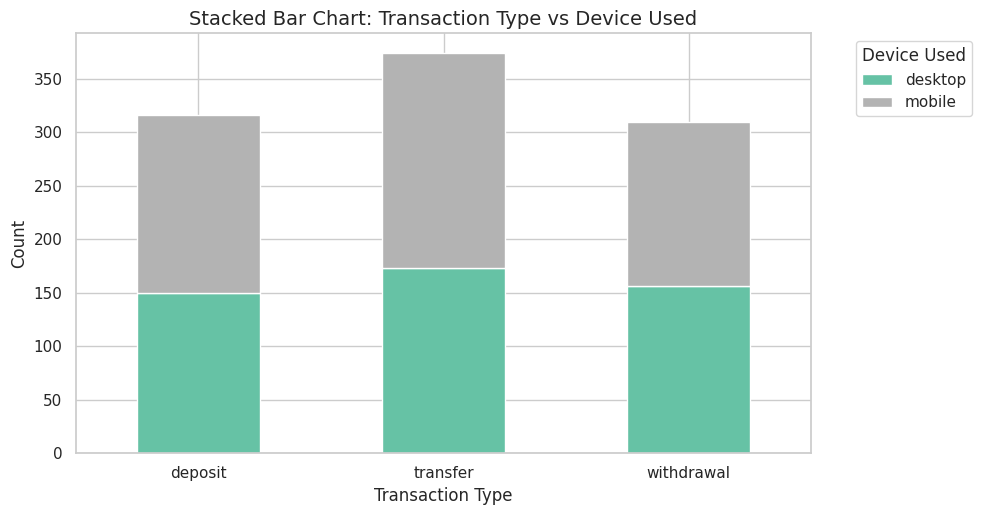

In [ ]:
# Step 1: Create a frequency table
stack_data = pd.crosstab(df['transaction_type'], df['device_used'])

# Step 2: Plot stacked bar chart
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Step 3: Add titles and labels
plt.title('Stacked Bar Chart: Transaction Type vs Device Used', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Device Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


**Why did you pick this chart?**

A stacked bar chart allows us to see:

The total count for each Transaction Type

The proportion of devices (desktop vs mobile) used for each type

Helps understand device preferences per transaction type.




**📊 2. What is/are the insight(s) found from the chart?**

Transfer:

Has the highest count among transaction types.

Mobile usage is slightly higher than desktop.

Deposit and Withdrawal:

Fairly even split between mobile and desktop usage.

Desktop has a slight edge in deposits and withdrawals.



**💼 3. Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Users seem to prefer mobile for transfers, suggesting convenience or on-the-go behavior.

Product teams can optimize mobile UI for transfers, and desktop interfaces for deposits/withdrawals.

**⚠️ Follow-Up Potential:**

Cross-check with fraud or failure rates by device + transaction type to see if some combinations are more risky.

Could lead to device-based fraud rules or improved security checks.


####**Chart-8 Transaction type vs Network slice id**


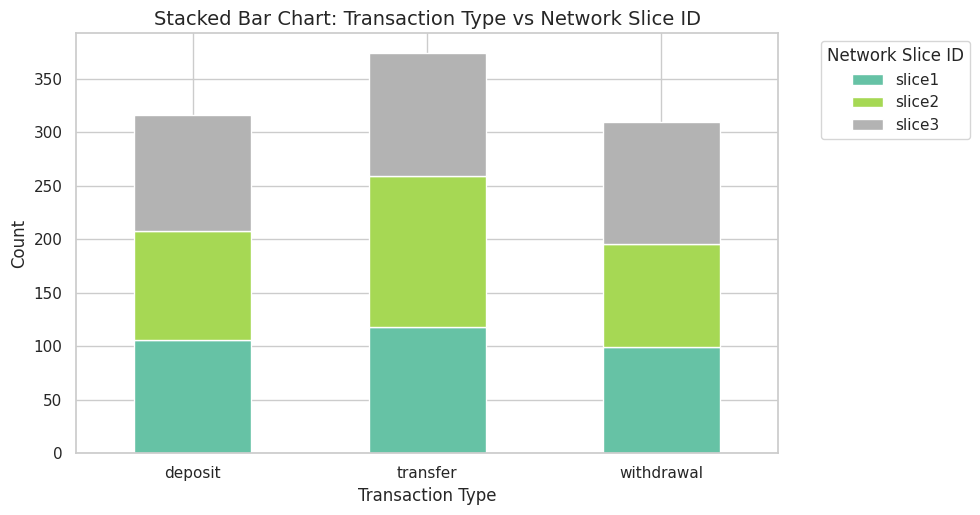

In [ ]:
# Step 1: Create a crosstab (contingency table)
stack_data = pd.crosstab(df['transaction_type'], df['network_slice_id'])

# Step 2: Plot as stacked bar chart
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Step 3: Formatting
plt.title('Stacked Bar Chart: Transaction Type vs Network Slice ID', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Network Slice ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


**Why did you pick this chart?**

A stacked bar chart shows:

The volume of each transaction type

How transactions are distributed across network slices (slice1, slice2, slice3)

Helps evaluate if certain transaction types favor certain slices.



**📊 2. What is/are the insight(s) found from the chart?**

All three transaction types (deposit, transfer, withdrawal) are distributed fairly evenly across slices.

Transfer transactions have the highest total count, with a notable load on slice2.

Deposits and withdrawals appear more balanced, but still lean slightly towards slice2 and slice3.



**💼 3. Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Helps network engineers monitor and optimize resource allocation per slice.

If slice2 is handling more transfer load, it might need higher bandwidth or reduced latency tuning.

**⚠️ Follow-Up Needed:**

Analyze latency and failure rates per slice for each transaction type.

Check if any slice correlates with high fraud or failure, particularly for sensitive operations like transfers.

####**Chart-9 Transaction status vs Device used**


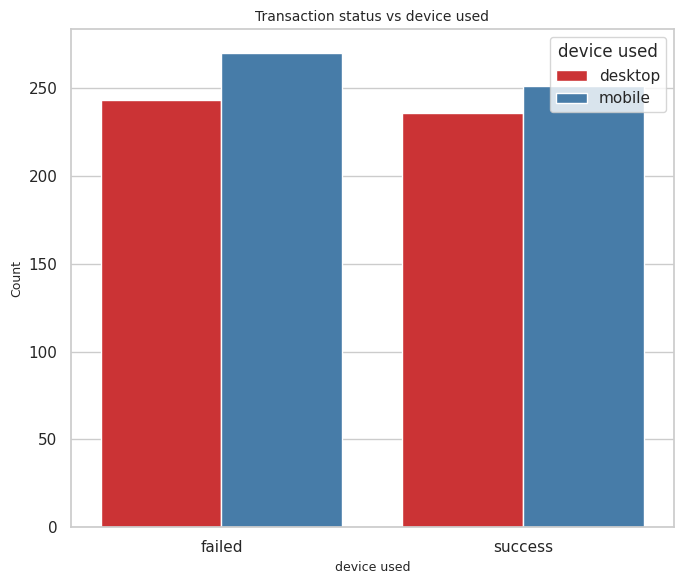

In [ ]:
plt.figure(figsize=(7, 6))

# Create grouped bar plot
sns.countplot(x='transaction_status', hue='device_used', data=df, palette='Set1')

# Add titles and labels
plt.title('Transaction status vs device used', fontsize=10)
plt.xlabel('device used', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.legend(title='device used')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Why did you pick this chart?**

A grouped bar chart makes it easy to compare how success/failure rates differ across device types (mobile vs desktop).

It helps uncover any patterns or biases in performance across platforms.



**What is/are the insight(s) found from the chart?**

**Mobile Devices:**

Have a slightly higher number of both failed and successful transactions than desktops.

Slightly more failures than successes.

**Desktop Devices:**

Fewer transactions overall than mobile.

Success and failure counts are nearly balanced.

**Will the gained insights help create a positive business impact?**

Yes.

**✅ Positive Impact Opportunity:**

Teams can prioritize QA and optimization efforts on the mobile platform.

Can also use this insight to retrain fraud models or adjust timeout thresholds for mobile.

**⚠️ Potential Risk:**

If mobile failures are not addressed, it could lead to user frustration or higher dropout rates, especially since mobile is the dominant channel.



####**Chart-10 Transaction status vs Network_slice_id**

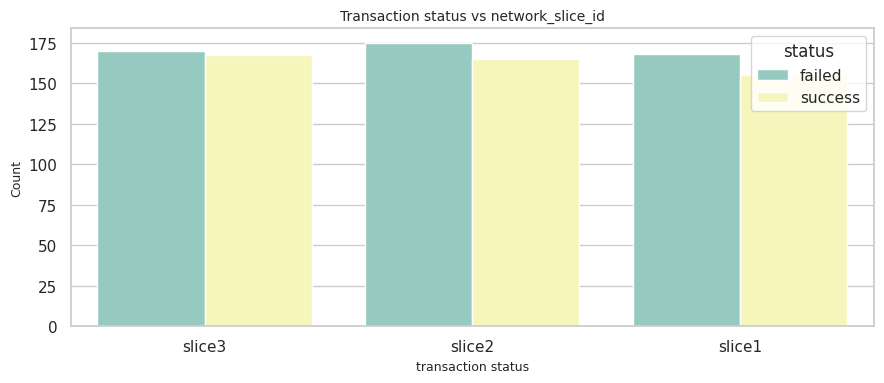

In [ ]:
plt.figure(figsize=(9, 4))

# Create grouped bar plot
sns.countplot(x='network_slice_id', hue='transaction_status', data=df, palette='Set3')

# Add titles and labels
plt.title('Transaction status vs network_slice_id', fontsize=10)
plt.xlabel('transaction status', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.legend(title='status')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Why did you pick this chart?**

This grouped bar chart was selected to evaluate how different network slices (slice1, slice2, slice3) perform in terms of transaction outcomes — success vs failure. It's ideal for identifying performance variation across slices, which is crucial in network-sensitive systems (like 5G or telecom apps).



**What is/are the insight(s) found from the chart?**



All three slices show slightly more failed transactions than successful ones.

Among them, slice2 has the highest count of failed transactions overall.

Slice1 shows the largest gap between failed and successful transactions — indicating it might be the least stable.



**Will the gained insights help create a positive business impact?**

This insight can guide technical teams to:

* Audit and optimize underperforming network slices (especially slice1 and slice2)

* Balance network traffic more intelligently across slices

* Improve transaction success rates, particularly for users routed through unstable slices

* This can lead to better customer experience, fewer failures, and potentially lower support and retry costs.

**Negative Impact**

* The consistently higher failure rate across all slices, especially in slice1, suggests:

* Network instability or under-resourced slices

* Possibility of downtime, latency, or data loss

* If unresolved, it could result in user frustration, loss of trust, or switching to competitors

* For businesses relying heavily on network performance, this could have direct financial and reputational impact.

####**Chart-11 Transaction status vs Fraud flag**


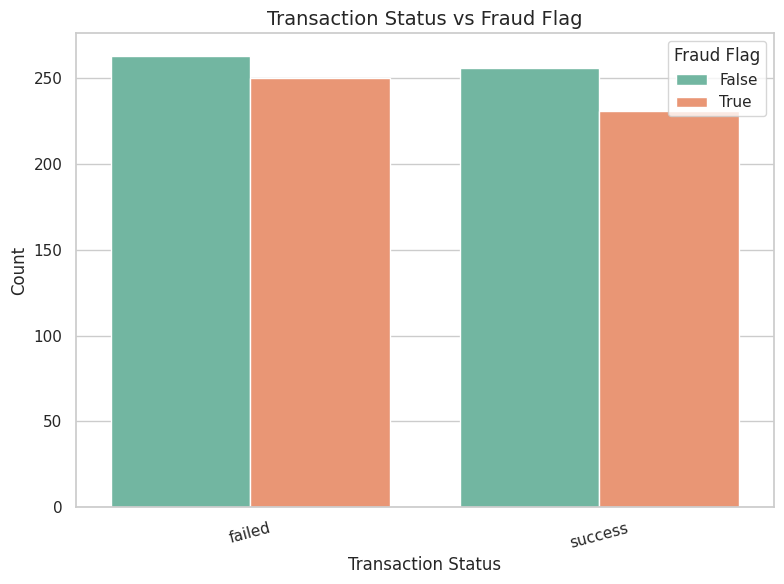

In [ ]:
plt.figure(figsize=(8, 6))

# Create grouped bar plot
sns.countplot(x='transaction_status', hue='fraud_flag', data=df, palette='Set2')

# Add titles and labels
plt.title('Transaction Status vs Fraud Flag', fontsize=14)
plt.xlabel('Transaction Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Flag')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


**Why was this chart picked?**

This grouped bar chart was chosen to analyze the relationship between fraud detection and transaction outcomes — to see if fraudulent transactions are more likely to fail or succeed. It’s ideal for spotting patterns in fraud behavior and system effectiveness.



**What is the key insight from the chart?**

* Both successful and failed transactions contain a significant number of fraudulent cases.

*  However, fraud is slightly more frequent in failed transactions compared to successful ones.

*  That said, a considerable portion of fraudulent transactions are still marked as “success”, which is concerning.

**What is the key insight from the chart?**

* Both successful and failed transactions contain a significant number of fraudulent cases.

* However, fraud is slightly more frequent in failed transactions compared to successful ones.

* That said, a considerable portion of fraudulent transactions are still marked as “success”, which is concerning.

**Negative Impact**

* The system is somewhat effective in detecting and blocking fraud, as many fraudulent transactions are failing.

* But since a noticeable number of frauds are still marked as “success,” there's room to tighten fraud detection models.

* Improving the accuracy of fraud prediction can lead to better security, reduced monetary loss, and increased trust from customers.

####**Chart -12 Device used vs Network slice id**

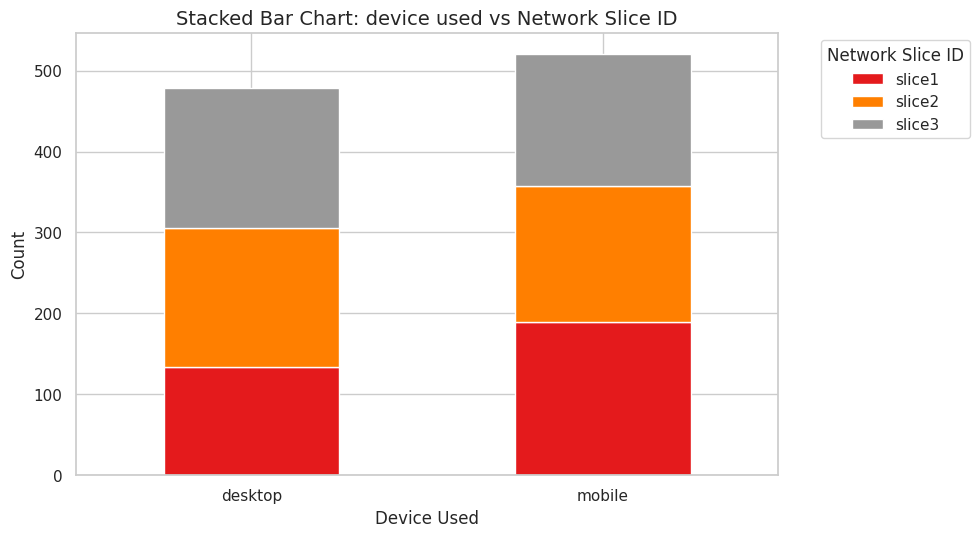

In [ ]:
# Step 1: Create a crosstab (contingency table)
stack_data = pd.crosstab(df['device_used'], df['network_slice_id'])

# Step 2: Plot as stacked bar chart
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')

# Step 3: Formatting
plt.title('Stacked Bar Chart: device used vs Network Slice ID', fontsize=14)
plt.xlabel('Device Used', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Network Slice ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


**Why was this chart picked?**

This stacked bar chart was chosen to show how different network slices (slice1, slice2, slice3) are distributed across device types (desktop and mobile). It helps visualize both the total usage and how each slice contributes within each device — perfect for multi-category comparison in one view.



**What is the key insight from the chart?**

* Both desktop and mobile devices utilize all three network slices fairly evenly.

* However, slice1 is used more on mobile devices than on desktops.

* Slice3 usage is almost equal across both devices, slightly more on desktops.

Overall, mobile usage is higher than desktop across slices, suggesting mobile is the more dominant device platform in this system.

**What is the key insight from the chart?**

This insight can help optimize network resource allocation by:

* Monitoring if any specific slice (like slice1 on mobile) is being over-utilized

* Adjusting network infrastructure or QoS settings to handle mobile-heavy traffic

* Improving performance and reducing latency or failure rates for users on popular slices

Understanding this also aids in device-specific slice tuning to ensure better user experience and efficiency.

**Negative Impacts**

* Congestion or performance issues if slice1 becomes overloaded

* Uneven resource usage, where other slices remain underutilized

* If not monitored, it might degrade the experience for a large chunk of users (mobile being dominant)

This highlights the need for load balancing or dynamic slice assignment, especially during peak times.



###**8.2.B Categorical vs Numerical**

####**Chart -13 Transaction amount vs Fraud Flag**

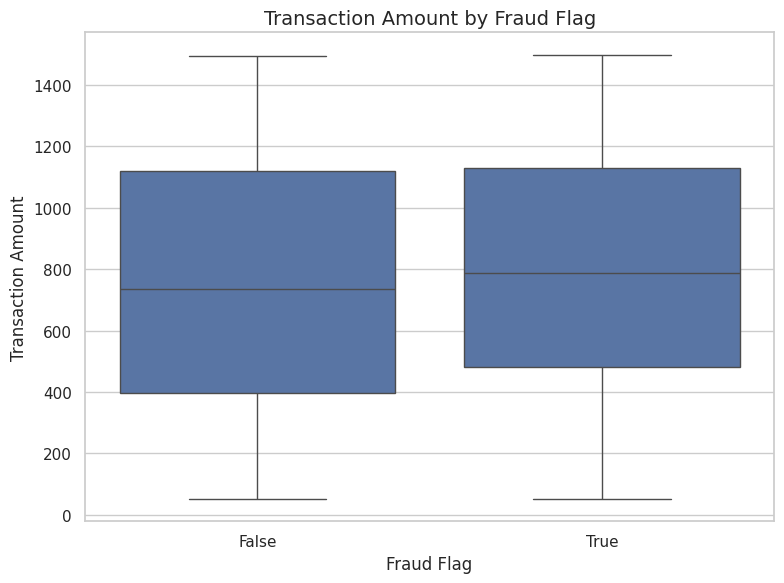

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='fraud_flag', y='transaction_amount', data=df)

plt.title('Transaction Amount by Fraud Flag', fontsize=14)
plt.xlabel('Fraud Flag', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)

plt.tight_layout()
plt.show()


####**Chart -14 Network Slice Id vs Latency**

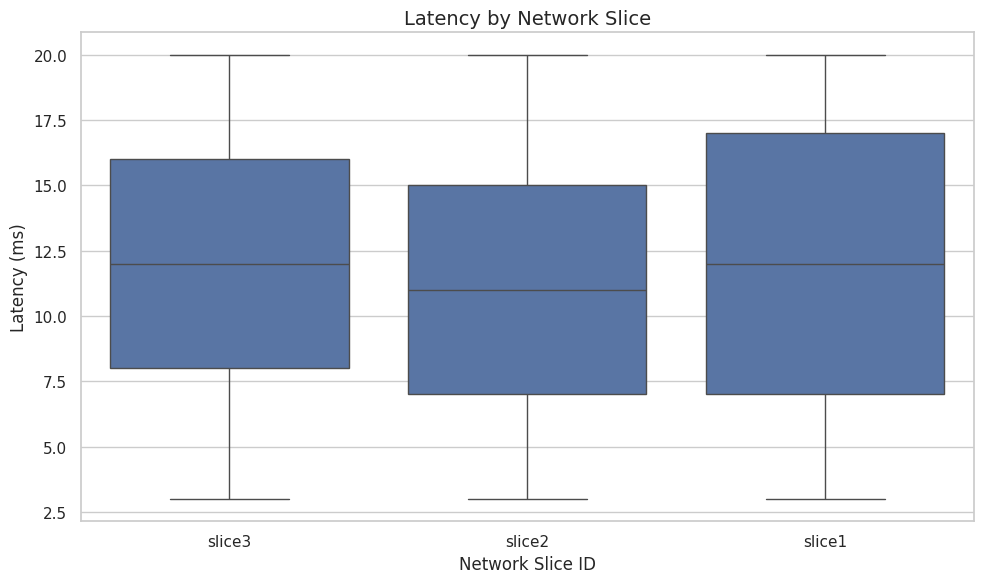

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='network_slice_id', y='latency_(ms)', data=df,)

plt.title('Latency by Network Slice', fontsize=14)
plt.xlabel('Network Slice ID', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)

plt.tight_layout()
plt.show()


####**Chart -15 Transaction status vs Latency**

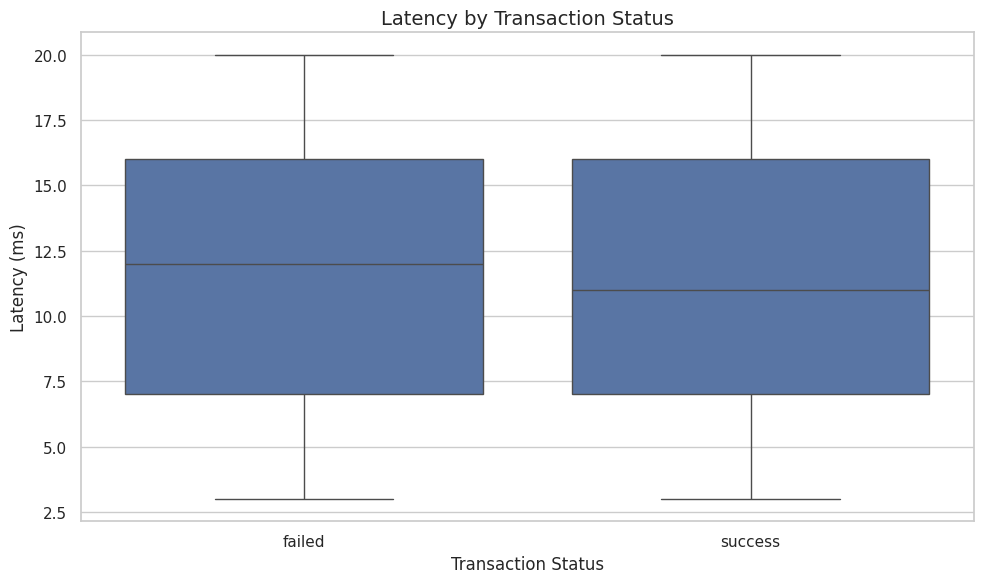

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='transaction_status', y='latency_(ms)', data=df)

plt.title('Latency by Transaction Status', fontsize=14)
plt.xlabel('Transaction Status', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)

plt.tight_layout()
plt.show()


####**Chart -16 Transaction type vs Transaction Amount**

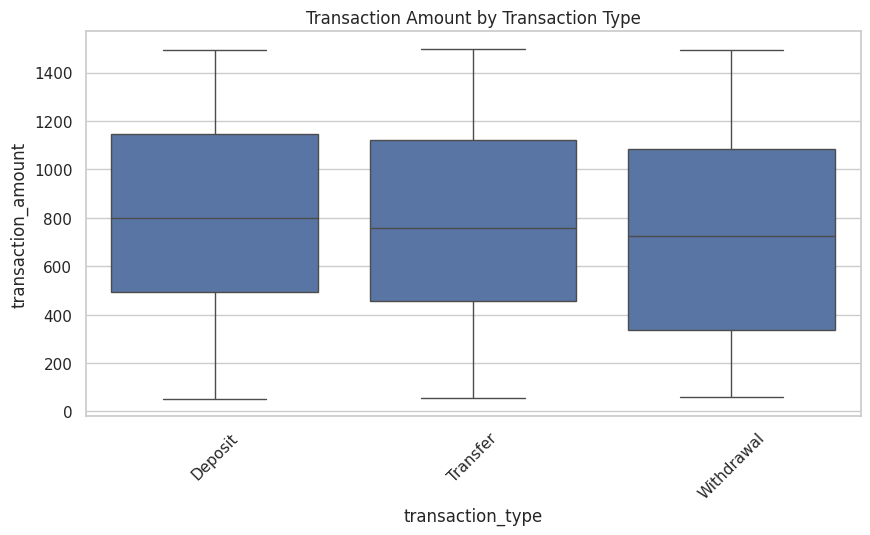

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='transaction_type', y='transaction_amount')
plt.title('Transaction Amount by Transaction Type')
plt.xticks(rotation=45)
plt.show()

###**8.2.C Numerical vs Numerical**

#### **Chart-14 Transaction amount vs Latency**

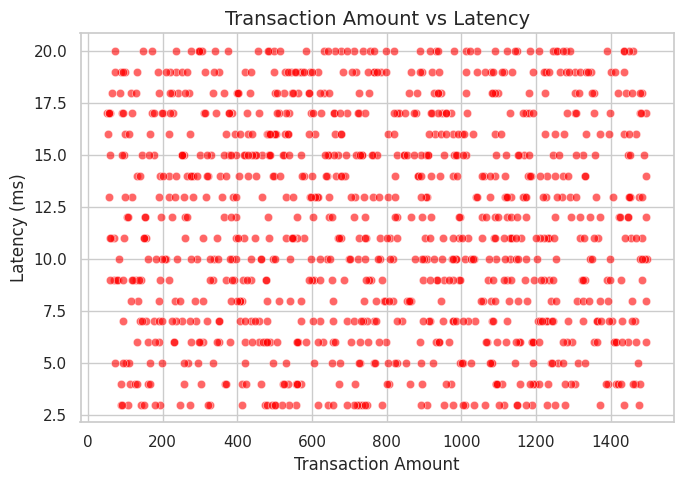

In [48]:
plt.figure(figsize=(7, 5))

sns.scatterplot(x='transaction_amount', y='latencyms', data=df, alpha=0.6,color='red')

plt.title('Transaction Amount vs Latency', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)

plt.tight_layout()
plt.show()


**Why was this chart picked?**

This scatter plot was selected to explore the relationship between transaction value and network latency. It helps us determine whether larger transactions tend to experience more (or less) delay during processing, which is crucial in systems where time-sensitive operations matter.

**What is the key insight from the chart?**

* The plot shows that latency values are fairly evenly spread across all transaction amounts.

* There's no visible upward or downward trend, and the dots are uniformly distributed from low to high transaction values.

* This indicates a lack of correlation — high-value transactions do not necessarily take longer (or shorter) to process than lower-value ones.



**Will the insight help create a positive business impact?**

* Your infrastructure is treating all transaction amounts equally in terms of latency.

* This is a good sign of network stability and fair processing, especially important in platforms like banking, trading, or e-commerce.

* It builds user confidence, knowing that higher-value transactions are not at higher risk of delay.



#### **Chart -15 Transaction Amount vs Slice Bandwidth**

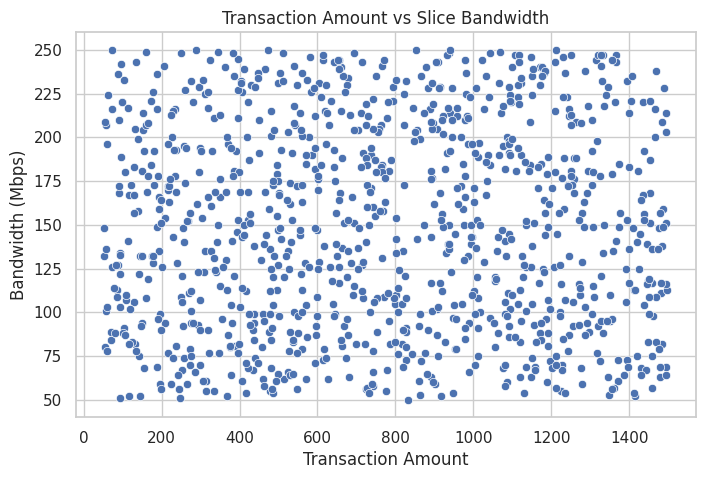

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='transaction_amount', y='bandwidthmbps')
plt.title('Transaction Amount vs Slice Bandwidth')
plt.xlabel('Transaction Amount')
plt.ylabel('Bandwidth (Mbps)')
plt.show()


**Why was this chart picked?**

This scatter plot was selected to explore the relationship between the value of a transaction and the network bandwidth allocated (slice bandwidth in Mbps). The goal is to check whether high-value transactions are being supported with higher bandwidth — which would be expected in systems that optimize for speed and reliability.



**What is the key insight from the chart?**

* The data points are widely and evenly scattered.

* There is no clear trend — large transaction amounts occur across all bandwidth levels, from 50 Mbps to 250 Mbps.

* This suggests that transaction amount and slice bandwidth are independent of each other.



**Will the insight help create a positive business impact?**

Yes — it shows the system is not biased or limited in allocating bandwidth based on transaction value.

* All transactions, whether big or small, get equal opportunity across bandwidth slices.

* This could be ideal in a system that values fairness and uniform quality of service.

However, it also reveals a possible optimization gap...

**Negative Impact**

If the business wants larger transactions to receive higher-quality bandwidth (for faster and safer processing), the current system isn’t doing that.

Not prioritizing high-value transactions could risk delays, failures, or dissatisfaction among high-tier clients in critical environments (e.g., finance or logistics).

A priority-based slice allocation model might enhance performance for high-value users and reduce business risk.

####**Chart -16 Latency vs Bandwidth**

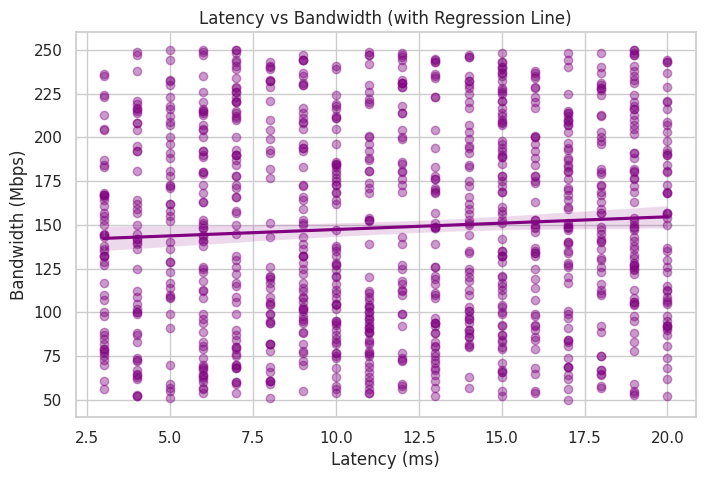

In [49]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='latencyms', y='bandwidthmbps', scatter_kws={'alpha': 0.4},color='purple')
plt.title('Latency vs Bandwidth (with Regression Line)')
plt.xlabel('Latency (ms)')
plt.ylabel('Bandwidth (Mbps)')
plt.show()

##**7.3 Multivariate Analysis**


Multivariate analysis examines relationships between three or more variables at once. It helps uncover complex patterns and interactions in your dataset that are not visible with just univariate or bivariate methods.



<Axes: >

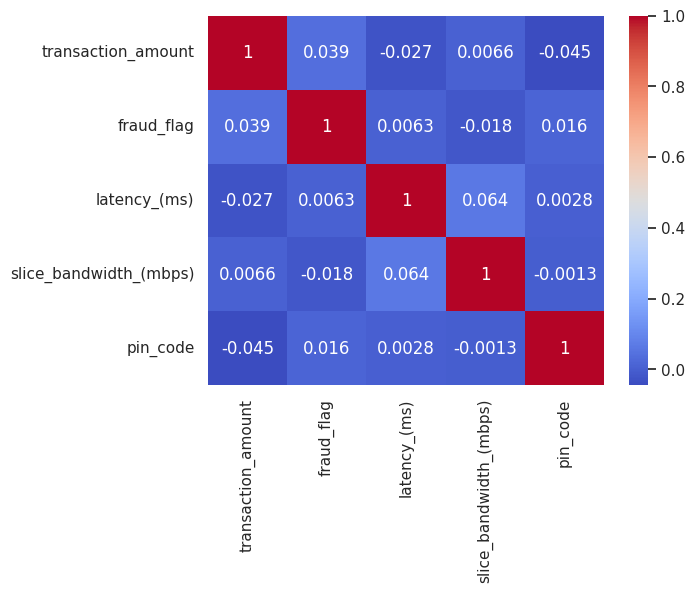

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


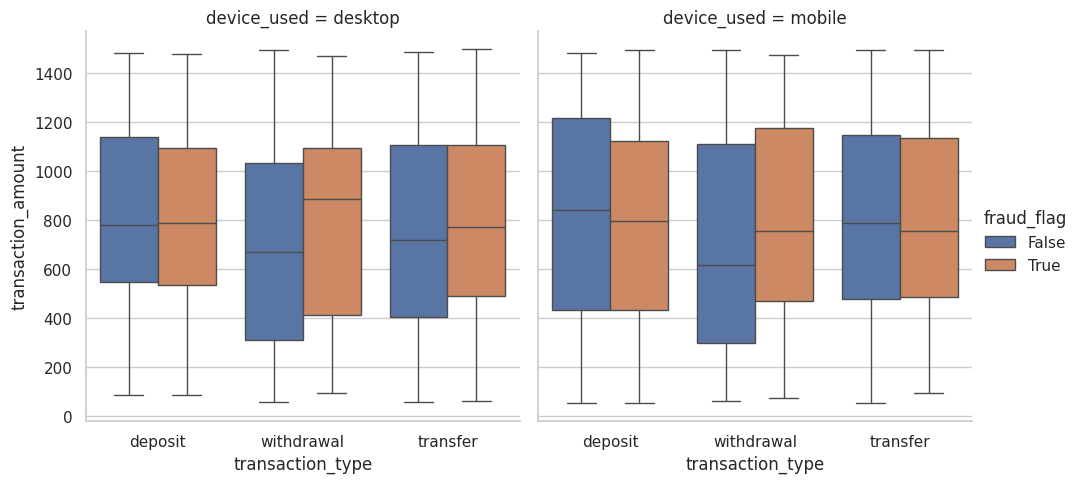

In [ ]:
sns.catplot(x='transaction_type', y='transaction_amount', hue='fraud_flag', kind='box', data=df, col='device_used')
